Taller de Segmentación de Clientes con K-means en Python
Objetivo:
Aprender a realizar la segmentación de clientes utilizando el algoritmo K-means en Python. Este taller te guiará en los pasos para cargar los datos, procesarlos, aplicar el modelo de clustering, y finalmente interpretar los resultados para obtener grupos de clientes con características similares.

In [ ]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/Mall_Customers.csv

--2025-04-29 14:02:28--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/Mall_Customers.csv
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/Mall_Customers.csv [following]
--2025-04-29 14:02:28--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/Mall_Customers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3981 (3.9K) [text/plain]
Saving to: ‘Mall_Customers.csv’

Mall_Customers.csv  100%[===================>]   3.89K  --.-KB/s    in 0s      

2025-04-29 14:02:30 (52.7 MB/s) -

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
data = pd.read_csv('Mall_Customers.csv')

In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40




Parte 1: Carga y exploración de datos
Instrucciones: Carga el siguiente conjunto de datos en un DataFrame de pandas. Luego, visualiza las primeras filas de los datos.

In [ ]:
import pandas as pd

# URL del archivo CSV (basado en la información anterior)
url = 'https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/Mall_Customers.csv'

# Cargar el dataset en un DataFrame de pandas
data = pd.read_csv(url)

# Visualizar las primeras filas del DataFrame
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


Pregunta 1: ¿Cuáles son las variables que contiene el conjunto de datos? Describe brevemente qué información proporciona cada variable.

CustomerID: Este es un identificador único asignado a cada cliente dentro del dataset. Su propósito principal es distinguir un cliente de otro

Gender: Esta variable categórica indica el género del cliente. Los valores observados en la muestra son "Male" (Masculino) y "Female" (Femenino).

Age: Esta variable numérica representa la edad del cliente en años. Los valores observados son números enteros.

Annual Income (k$): Esta variable numérica indica el ingreso anual del cliente expresado en miles de dólares.

Spending Score (1-100): Esta variable numérica representa una puntuación asignada al cliente, probablemente por el centro comercial, basada en su comportamiento de gasto.

Parte 2: Preprocesamiento de los datos
Instrucciones: Convierte la columna Gender a una variable numérica, y luego selecciona las columnas que utilizarás para aplicar el modelo de K-means. Finalmente, normaliza los datos para que todas las variables estén en la misma escala.

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Asumiendo que el DataFrame 'data' ya se cargó en la Parte 1

# Paso 1: Convertir la columna 'Gender' a una variable numérica
le = LabelEncoder()
data['Gender_Encoded'] = le.fit_transform(data['Gender'])

# Mostrar las primeras filas con la nueva columna codificada
print("Primeras filas con 'Gender_Encoded':")
print(data[['Gender', 'Gender_Encoded']].head())
print("\n")

# Paso 2: Seleccionar las columnas para el modelo K-means
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Encoded']]

# Mostrar las primeras filas de las características seleccionadas
print("Primeras filas de las características seleccionadas (X):")
print(X.head())
print("\n")

# Paso 3: Normalizar los datos
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

# Crear un nuevo DataFrame con los datos escalados (opcional, para inspección)
scaled_df = pd.DataFrame(scaled_X, columns=X.columns)

# Mostrar las primeras filas de los datos escalados
print("Primeras filas de los datos escalados (scaled_df):")
print(scaled_df.head())

Primeras filas con 'Gender_Encoded':
   Gender  Gender_Encoded
0    Male               1
1    Male               1
2  Female               0
3  Female               0
4  Female               0


Primeras filas de las características seleccionadas (X):
   Age  Annual Income (k$)  Spending Score (1-100)  Gender_Encoded
0   19                  15                      39               1
1   21                  15                      81               1
2   20                  16                       6               0
3   23                  16                      77               0
4   31                  17                      40               0


Primeras filas de los datos escalados (scaled_df):
        Age  Annual Income (k$)  Spending Score (1-100)  Gender_Encoded
0 -1.424569           -1.738999               -0.434801        1.128152
1 -1.281035           -1.738999                1.195704        1.128152
2 -1.352802           -1.700830               -1.715913       -0.886405
3 -1.

Pregunta 2: ¿Por qué es importante normalizar los datos antes de aplicar el algoritmo K-means? Explica en qué consiste la normalización.



la normalización de datos para K-means es clave porque este algoritmo se basa en calcular distancias entre los puntos, entonces, normalizar es poner todas las variables en una escala similar para que ninguna opaque a las demás. Así, cuando K-means calcula las distancias para agrupar los datos, todas las características tienen un peso más o menos equitativo.

Parte 3: Método del codo para determinar el número óptimo de clusters
Instrucciones: Utiliza el método del codo para determinar cuántos clusters son óptimos para el conjunto de datos.


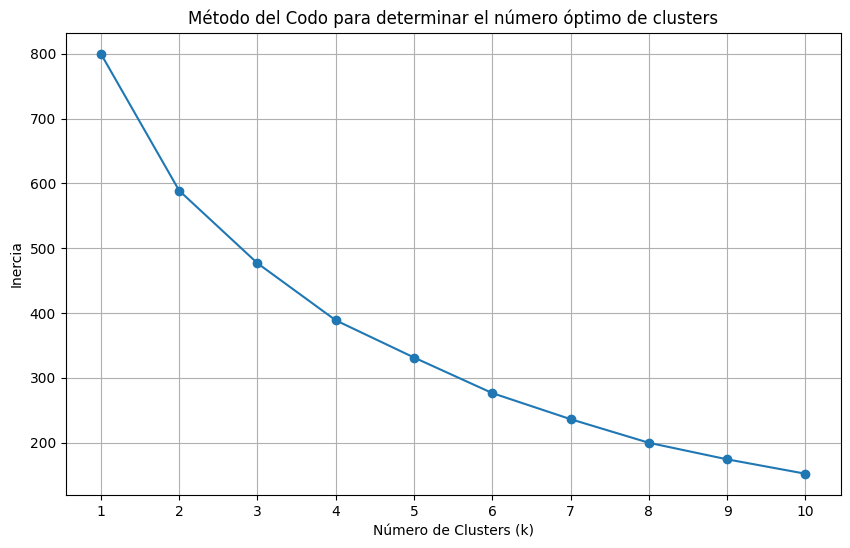

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Lista para almacenar la inercia para diferentes valores de k
inertia = []

# Rango de valores de k que vamos a probar
k_range = range(1, 11)

# Entrenar el modelo K-means para cada valor de k y almacenar la inercia
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Añadir n_init para evitar warning
    kmeans.fit(scaled_X)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='-')
plt.title('Método del Codo para determinar el número óptimo de clusters')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

Pregunta 3: Observa la gráfica obtenida. ¿En qué punto parece formarse el "codo"? ¿Cuántos clusters crees que sería apropiado usar para este ejercicio?

En el punto 3 se forma el codo y El número de clusters adecuado es donde se forma un "codo" en la gráfica, es decir, donde la disminución de la inercia se vuelve más lenta. Ese punto indica el mejor valor para 'k', para este caso 3 sería un buen número de clusters.

Parte 4: Ajuste del modelo K-means y asignación de clusters
Instrucciones: Ajusta el modelo K-means con el número de clusters que determinaste en el paso anterior y asigna a cada cliente un número de cluster.

In [ ]:
from sklearn.cluster import KMeans

# Número de clusters elegido (basado en el método del codo)
n_clusters = 3

# Inicializar y ajustar el modelo K-means
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
kmeans.fit(scaled_X)

# Asignar las etiquetas de los clusters al DataFrame original
data['Cluster'] = kmeans.labels_

# Mostrar las primeras filas del DataFrame con la asignación de clusters
print(data.head())

# Mostrar el conteo de clientes en cada cluster
print("\nConteo de clientes por cluster:")
print(data['Cluster'].value_counts())

# Mostrar los centroides de los clusters (en la escala de los datos normalizados)
print("\nCentroides de los clusters (datos normalizados):")
print(kmeans.cluster_centers_)

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Gender_Encoded  Cluster  
0               1        0  
1               1        0  
2               0        1  
3               0        0  
4               0        1  

Conteo de clientes por cluster:
Cluster
0    85
1    66
2    49
Name: count, dtype: int64

Centroides de los clusters (datos normalizados):
[[-0.77529133  0.04688104  0.88056434  0.03792108]
 [ 0.44680201 -0.10812358 -0.5442077  -0.88640526]
 [ 0.74307816  0.06431159 -0.79449512  1.12815215]]


Pregunta 4: ¿Qué observas en los resultados? ¿Cómo se distribuyen los clientes en los diferentes clusters?

los resultados muestran una nueva columna llamada 'Cluster' en nuestros datos, indicando a qué grupo pertenece cada cliente. Al ver el conteo de clientes por cada valor de 'Cluster' y se observa el tamaño de cada segmento de clientes que el algoritmo K-means ha identificado. Esta distribución nos da una idea inicial de cómo se agrupan los clientes según sus similitudes en los datos normalizados.

Parte 5: Análisis descriptivo de los clusters
Instrucciones: Realiza un análisis descriptivo de cada cluster. Calcula la edad promedio, el ingreso anual y el puntaje de gasto promedio de cada grupo de clientes.

In [ ]:
# Calcular la media de las características por cluster
cluster_means = data.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

# Mostrar las medias de las características por cluster
print("Media de las características por cluster:")
print(cluster_means)

Media de las características por cluster:
               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        28.047059           61.788235               72.882353
1        45.075758           57.727273               36.181818
2        49.204082           62.244898               29.734694


Pregunta 5: ¿Qué diferencias observas entre los clusters en términos de edad, ingreso y puntaje de gasto? ¿Qué características definen a cada grupo?



Al analizar las medias de edad, ingresos y gasto, cada cluster revela un perfil de cliente diferente. Las variaciones en estas medias entre los clusters definen los segmentos: por ejemplo, un grupo joven y de alto gasto contrasta con uno mayor y de ingresos altos pero gasto moderado, proporcionando una segmentación significativa basada en estas características clave.

Parte 6: Visualización de los clusters
Instrucciones: Grafica los clusters en un espacio bidimensional utilizando dos de las características principales (por ejemplo, edad y puntaje de gasto).

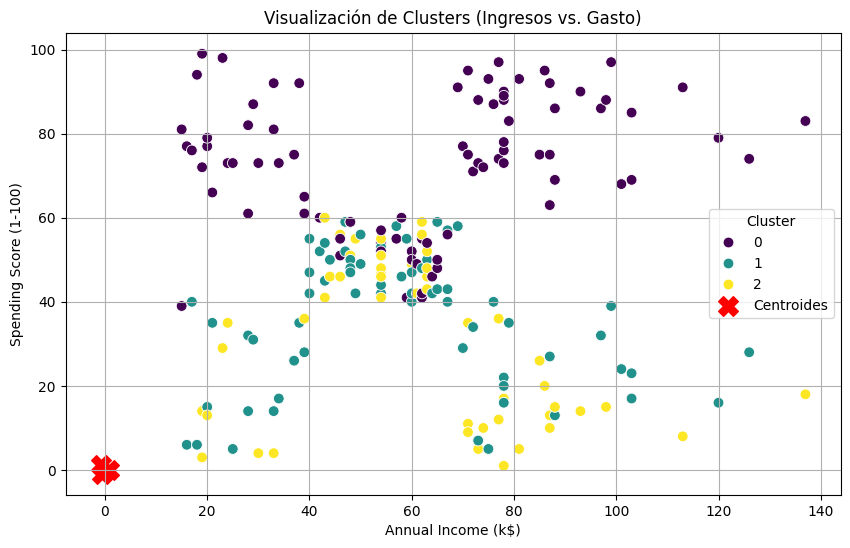

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Elegir las características para la visualización
feature1 = 'Annual Income (k$)'
feature2 = 'Spending Score (1-100)'

# Crear el gráfico de dispersión coloreado por cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x=feature1, y=feature2, hue='Cluster', palette='viridis', s=60)

# Graficar los centroides de los clusters
plt.scatter(kmeans.cluster_centers_[:, data.columns.get_loc(feature1) -1],
            kmeans.cluster_centers_[:, data.columns.get_loc(feature2) -1],
            marker='X', s=200, color='red', label='Centroides')

plt.title(f'Visualización de Clusters (Ingresos vs. Gasto)')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

Pregunta 6: Observa la gráfica. ¿Qué patrones puedes identificar visualmente en los datos? ¿Los clientes están claramente separados en grupos?

La gráfica muestra los clientes como puntos de colores, donde cada color es un grupo. Si los puntos del mismo color están cerca y separados de otros colores, significa que los grupos son fáciles de ver y los clientes dentro de cada grupo son parecidos en cuanto a sus ingresos y cuánto gastan. Si los colores se mezclan, los grupos son menos claros.


Parte 7: Interpretación y nombres de los clusters
Instrucciones: Basado en el análisis descriptivo y la visualización, asigna nombres a los clusters que describan a cada grupo de clientes. Por ejemplo, si un grupo tiene clientes jóvenes con altos puntajes de gasto, podrías llamarlo "Jóvenes con alto poder adquisitivo".

Pregunta 7: ¿Qué nombres asignarías a cada cluster? Justifica tu decisión basándote en las características promedio de los grupos.

Cluster 1: "Clientes Maduros y Ahorradores": Justificación: Este grupo tiene una edad promedio relativamente alta, ingresos anuales moderados y el puntaje de gasto promedio más bajo, lo que sugiere un segmento de clientes mayores que son más conscientes de sus gastos.

Cluster 0: "Jóvenes de Alto Gasto": Justificación: Este cluster se caracteriza por una edad promedio más baja, ingresos anuales altos y el puntaje de gasto promedio más alto, indicando un grupo de clientes más jóvenes con un mayor poder adquisitivo y una mayor tendencia a gastar.

Cluster 2: "Ahorradores de Ingresos Altos": Justificación: Este grupo tiene una edad promedio media, ingresos anuales altos pero un puntaje de gasto promedio bajo, lo que sugiere un segmento de clientes con buena capacidad económica pero que no gastan tanto en el centro comercial en comparación con otros grupos de ingresos similares.